In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = './머신러닝데이터.xlsx'

In [3]:
# 모든 데이터를 불러온다
cnt_df = pd.read_excel(filename, sheet_name='CNT', engine='openpyxl')
scoring_df = pd.read_excel(filename, sheet_name='scoring_origin', engine='openpyxl')
task_completion_time = pd.read_excel(filename, sheet_name='task_time_for_correlation', engine='openpyxl')
sms_reply = pd.read_excel(filename, sheet_name='SMS_reply', engine='openpyxl')
weather_searching_site_address = pd.read_excel(filename, sheet_name='weather_searching_사이트주소', engine='openpyxl')
weather_searching_temp_humid = pd.read_excel(filename, sheet_name='weather_searching_온도습도', engine='openpyxl')
weather_searching_region_name = pd.read_excel(filename, sheet_name='weather_searching_지역이름', engine='openpyxl')

In [4]:
# BAC column만 가져온다(Label)
bac_df = cnt_df['BAC']

# Participant, BAC column을 제거한다
cnt_df = cnt_df.drop(['Participant', 'BAC'], axis=1)
scoring_df = scoring_df.drop(['Participant', 'BAC'], axis=1)
task_completion_time_df = task_completion_time.drop(['Participant', 'BAC'], axis=1)
sms_reply_df = sms_reply.drop(['Participant', 'BAC'], axis=1)
weather_searching_site_address_df = weather_searching_site_address.drop(['Participant', 'BAC'], axis=1)
weather_searching_temp_humid_df = weather_searching_temp_humid.drop(['Participant', 'BAC'], axis=1)
weather_searching_region_name_df = weather_searching_region_name.drop(['Participant', 'BAC'], axis=1)

# 모든 Feature List
sms_reply, weather_searching_사이트주소, weather_searching_온도습도, weather_searching_지역이름은 feature 리스트가 같습니다

In [5]:
# cnt = ['cnt_mean_response_time_NB', 'cnt_mean_response_time_TS', 'cnt_mean_response_time_SART', 'cnt_mean_response_time_ALL', 
# 'cnt_accuracy_NB', 'cnt_accuracy_TS', 'cnt_accuracy_SART', 'cnt_accuracy_ALL']

# scoring = ['Routine_Screen_Unlock_Pattern', 'Routine_Phone_Register', 'Routine_Phone_Receive', 'Routine_SMS_Reply', 'Routine_Camera', 
# 'Routine_Location_Searching', 'Routine_Weather_Searching', 'Routine_Transfer', 'Routine_Location_Switching', 'Routine_Weather_Switching', 
# 'Transition_Phone_Register', 'Transition_Phone_Receive', 'Transition_SMS_Reply', 'Transition_Camera', 'Transition_Location_Searching', 
# 'Transition_Weather_Searching', 'Transition_Transfer', 'Transition_Location_Switching', 'Transition_Weather_Switching', 'Result_Phone_Register', 
# 'Result_Phone_Receive', 'Result_SMS_Reply', 'Result_Camera', 'Result_Location_Searching', 'Result_Weather_Searching', 'Result_Transfer', 
# 'Result_Location_Switching', 'Result_Weather_Switching', 'routine_sum_trial', 'transition_sum_trial', 'result_sum_trial', 'all_sum_trial']

# task = ['noti_response_app_start', 'phone_register_noti_response', 'phone_register_total_time_nt', 'phone_register_screen_unlocking_time', 
# 'phone_register_sms_start_time', 'phone_register_instruction_check_time', 'phone_register_total_time', 'phone_register_phone_number_register_time', 
# 'phone_register_call_time', 'phone_receive_noti response', 'phone_receive_total_time_nt', 'phone_receive_total_time', 'phone_receive_missing_call_time_1', 
# 'phone_receive_missing_call_time_2', 'sms_reply_noti_response_time', 'sms_reply_total_time_nt', 'sms_reply_compeltion_time', 'sms_reply_total_time', 
# 'camera_noti_response', 'camera_total_time_nt', 'camera_instruction_check_time', 'camera_total_time', 'camera_taken_time', 'camera_gallery_delete_time', 
# 'transfer_noti_response_time', 'transfer_total_time_nt', 'transfer_instruction_check_time', 'transfer_total_time', 'transfer_usage_time', 'transfer_share_time', 
# 'weather_searching_noti_response', 'weather_searching_total_time_nt', 'weather_searching_instruction_check_time', 'weather_searching_total_time', 
# 'weather_information_searching_time', 'weather_information_sharing_time', 'weather_switching_notification_response_time', 'weather_switching_total_time_nt', 
# 'weather_switching_instruction_check_time', 'weather_switching_total_time', 'weather_switching_first_searching_keyword_typing_time', 
# 'weather_switching_second_searching_keyword_typing_time', 'weather_switching_information_searching_time', 'weather_switching_information_sharing_texting_time', 
# 'location_searching_noti_response_time', 'location_searching_total_time_nt', 'location_searching_instruction_check_time', 'location_searching_total_time', 
# 'location_searching_food_typing_time', 'location_searching_foodtyping_mapfinding_time', 'location_searching_mapfinding_time', 
# 'location_searching_route_sharing_texting_time', 'location_switching_notification_response', 'location_switching_total_time_nt', 'location_switching_instruction_check', 
# 'location_switching_total_time', 'location_switching_first_map_typing_time', 'location_switching_second_map_typing_time', 'location_switching_map_finding_time', 
# 'location_switching_map_route_sharing_time']

# sms_and_ws = ['average intercharacter time', 'std intercharacter time', 'median intercharacter time', 'min intercharacter time', 'max intercharacter time', 
# 'total_time (S)', 'total_count', 'IS (C+IF+INF+F)', 'backspace (F)', 'C', 'IF', 'INF', 'Shift', 'ISø (IS+S)', 'T (total_count-F)', 'WPS', 'WPM', 'AdjWPS', 
# 'AdjWPM', 'CPS', 'KSPS', 'GPS', 'KSPC', 'GPC', 'MSD', 'COER', 'UER', 'TER', 'CE', 'PC', 'UB', 'WB', 'CPC']

# Notice
##### 빼고 싶은 데이터가 있다면 그 데이터의 column 배열을 빈 배열로 만드시면 됩니다.

## 다만 task comletion time 데이터에서 noti_response_app_start feature를 넣으시려면 average_noti_response_app_start, median_noti_response_app_start가 아닌 noti_response_app_start라고 적어주시면 됩니다.


In [6]:
# cnt_columns = ['cnt_mean_response_time_NB', 'cnt_mean_response_time_TS', 'cnt_mean_response_time_SART', 'cnt_mean_response_time_ALL', 
# 'cnt_accuracy_NB', 'cnt_accuracy_TS', 'cnt_accuracy_SART', 'cnt_accuracy_ALL']
cnt_columns = []

# scoring_columns = ['Routine_Screen_Unlock_Pattern', 'Transition_Phone_Register', 'Transition_Phone_Receive', 'Transition_SMS_Reply', 
# 'Transition_Camera', 'Transition_Location_Searching', 'Transition_Weather_Searching', 'Transition_Transfer', 'Transition_Location_Switching', 
# 'Transition_Weather_Switching', 'transition_sum_trial', 'Result_Phone_Register', 'Result_Phone_Receive', 'Result_SMS_Reply', 'Result_Camera', 
# 'Result_Location_Searching', 'Result_Weather_Searching', 'Result_Transfer', 'Result_Location_Switching', 'Result_Weather_Switching', 'result_sum_trial']
scoring_columns = []

# task_completion_time_columns = ['noti_response_app_start', 'phone_register_noti_response', 'phone_register_screen_unlocking_time', 'phone_register_sms_start_time', 
# 'phone_register_phone_number_register_time', 'phone_register_call_time', 'phone_register_total_time', 'phone_receive_missing_call_time_2',
# 'phone_receive_total_time', 'sms_reply_compeltion_time','sms_reply_total_time', 'camera_taken_time', 'camera_gallery_delete_time', 'camera_total_time', 
# 'transfer_usage_time', 'transfer_share_time', 'transfer_total_time','weather_information_searching_time', 'weather_information_sharing_time', 
# 'weather_searching_total_time']
task_completion_time_columns = []

# sms_reply_columns = ['average intercharacter time', 'median intercharacter time', 'min intercharacter time', 'max intercharacter time', 
# 'CPS', 'KSPS', 'GPS', 'COER', 'UER', 'TER', 'UB', 'WB']
sms_reply_columns = []

weather_searching_site_address_columns = ['average intercharacter time', 'median intercharacter time', 'min intercharacter time', 'max intercharacter time', 
'CPS', 'KSPS', 'COER', 'UB', 'WB']
# weather_searching_site_address_columns = []

# weather_searching_temp_humid_columns = ['average intercharacter time', 'median intercharacter time', 'min intercharacter time', 'max intercharacter time', 
# 'CPS', 'KSPS', 'COER', 'UB', 'WB']
weather_searching_temp_humid_columns = []

# weather_searching_region_name_columns = ['average intercharacter time', 'median intercharacter time', 'min intercharacter time', 'max intercharacter time', 
# 'CPS', 'KSPS', 'COER', 'UB', 'WB']
weather_searching_region_name_columns = []

In [7]:
# mean, median, raw 데이터 각각에 대해서 correlation을 뽑아야 하므로 데이터 프레임도 3개를 생성한다
# 다만 cnt 데이터는 mean, median이 존재하지 않으므로 raw 데이터만 생성한다
cnt_df = cnt_df[cnt_columns]

df_list = [scoring_df, task_completion_time_df, sms_reply_df, weather_searching_site_address_df, weather_searching_temp_humid_df, weather_searching_region_name_df]
col_list = [scoring_columns, task_completion_time_columns, sms_reply_columns, weather_searching_site_address_columns, weather_searching_temp_humid_columns, 
weather_searching_region_name_columns]

raw_df_list: list[pd.DataFrame] = []
mean_df_list: list[pd.DataFrame] = []
median_df_list: list[pd.DataFrame] = []
for i in range(len(df_list)):
    raw_cols = [col_name for col_name in col_list[i]]
    mean_cols = [col_name + '_mean' for col_name in col_list[i]]
    median_cols = [col_name + '_median' for col_name in col_list[i]]
    
    raw_df_list.append(df_list[i][raw_cols])
    mean_df_list.append(df_list[i][mean_cols])
    median_df_list.append(df_list[i][median_cols])

# feature명 수정하기
위에서 적은 feature명을 그대로 복사해서 가져온 다음 바꾸려는 feature만 수정하면 됩니다

In [8]:
# cnt_columns = ['cnt_mean_response_time_NB', 'cnt_mean_response_time_TS', 'cnt_mean_response_time_SART', 'cnt_mean_response_time_ALL', 
# 'cnt_accuracy_NB', 'cnt_accuracy_TS', 'cnt_accuracy_SART', 'cnt_accuracy_ALL']
cnt_columns = []

# scoring_columns = ['Routine_Screen_Unlock_Pattern', 'Transition_Phone_Register', 'Transition_Phone_Receive', 'Transition_SMS_Reply', 
# 'Transition_Camera', 'Transition_Location_Searching', 'Transition_Weather_Searching', 'Transition_Transfer', 'Transition_Location_Switching', 
# 'Transition_Weather_Switching', 'transition_sum_trial', 'Result_Phone_Register', 'Result_Phone_Receive', 'Result_SMS_Reply', 'Result_Camera', 
# 'Result_Location_Searching', 'Result_Weather_Searching', 'Result_Transfer', 'Result_Location_Switching', 'Result_Weather_Switching', 'result_sum_trial']
scoring_columns = []

# task_completion_time_columns = ['noti_response_app_start', 'phone_register_noti_response', 'phone_register_screen_unlocking_time', 'phone_register_sms_start_time', 
# 'phone_register_phone_number_register_time', 'phone_register_call_time', 'phone_register_total_time', 'phone_receive_missing_call_time_2',
# 'phone_receive_total_time', 'sms_reply_compeltion_time','sms_reply_total_time', 'camera_taken_time', 'camera_gallery_delete_time', 'camera_total_time', 
# 'transfer_usage_time', 'transfer_share_time', 'transfer_total_time','weather_information_searching_time', 'weather_information_sharing_time', 
# 'weather_searching_total_time']
task_completion_time_columns = []

# sms_reply_columns = ['average intercharacter time', 'median intercharacter time', 'min intercharacter time', 'max intercharacter time', 
# 'CPS', 'KSPS', 'GPS', 'COER', 'UER', 'TER', 'UB', 'WB']
sms_reply_columns = []

weather_searching_site_address_columns = ['average intercharacter time', 'median intercharacter time', 'min intercharacter time', 'max intercharacter time', 
'CPS', 'KSPS', 'COER', 'UB', 'WB']
# weather_searching_site_address_columns = []

# weather_searching_temp_humid_columns = ['average intercharacter time', 'median intercharacter time', 'min intercharacter time', 'max intercharacter time', 
# 'CPS', 'KSPS', 'COER', 'UB', 'WB']
weather_searching_temp_humid_columns = []

# weather_searching_region_name_columns = ['average intercharacter time', 'median intercharacter time', 'min intercharacter time', 'max intercharacter time', 
# 'CPS', 'KSPS', 'COER', 'UB', 'WB']
weather_searching_region_name_columns = []

In [9]:
cnt_df.columns = cnt_columns
changed_columns = [scoring_columns, task_completion_time_columns, sms_reply_columns, weather_searching_site_address_columns, weather_searching_temp_humid_columns,
weather_searching_region_name_columns]

# mean 데이터에 대해서 feature명을 수정한다
for i in range(len(mean_df_list)):
    columns_add_mean = [col_name + '_mean' for col_name in changed_columns[i]]
    mean_df_list[i].columns = columns_add_mean
# median 데이터에 대해서 feature명을 수정한다
for i in range(len(median_df_list)):
    columns_add_median = [col_name + '_median' for col_name in changed_columns[i]]
    median_df_list[i].columns = columns_add_median
# raw 데이터에 대해서 feature명을 수정한다
for i in range(len(raw_df_list)):
    raw_df_list[i].columns = changed_columns[i]

In [10]:
# 합쳐진 mean, median, raw 데이터 프레임을 생성한다
merged_mean_df = pd.concat([bac_df] + mean_df_list, axis=1)
merged_median_df = pd.concat([bac_df] + median_df_list, axis=1)
merged_raw_df = pd.concat([bac_df, cnt_df] + raw_df_list, axis=1)

# 각 셀에 들어갈 숫자의 폰트 사이즈를 정한다

In [11]:
fontsize = 23

# Mean data correlation

Text(0.5, 1.0, 'Mean Correlation Heatmap')

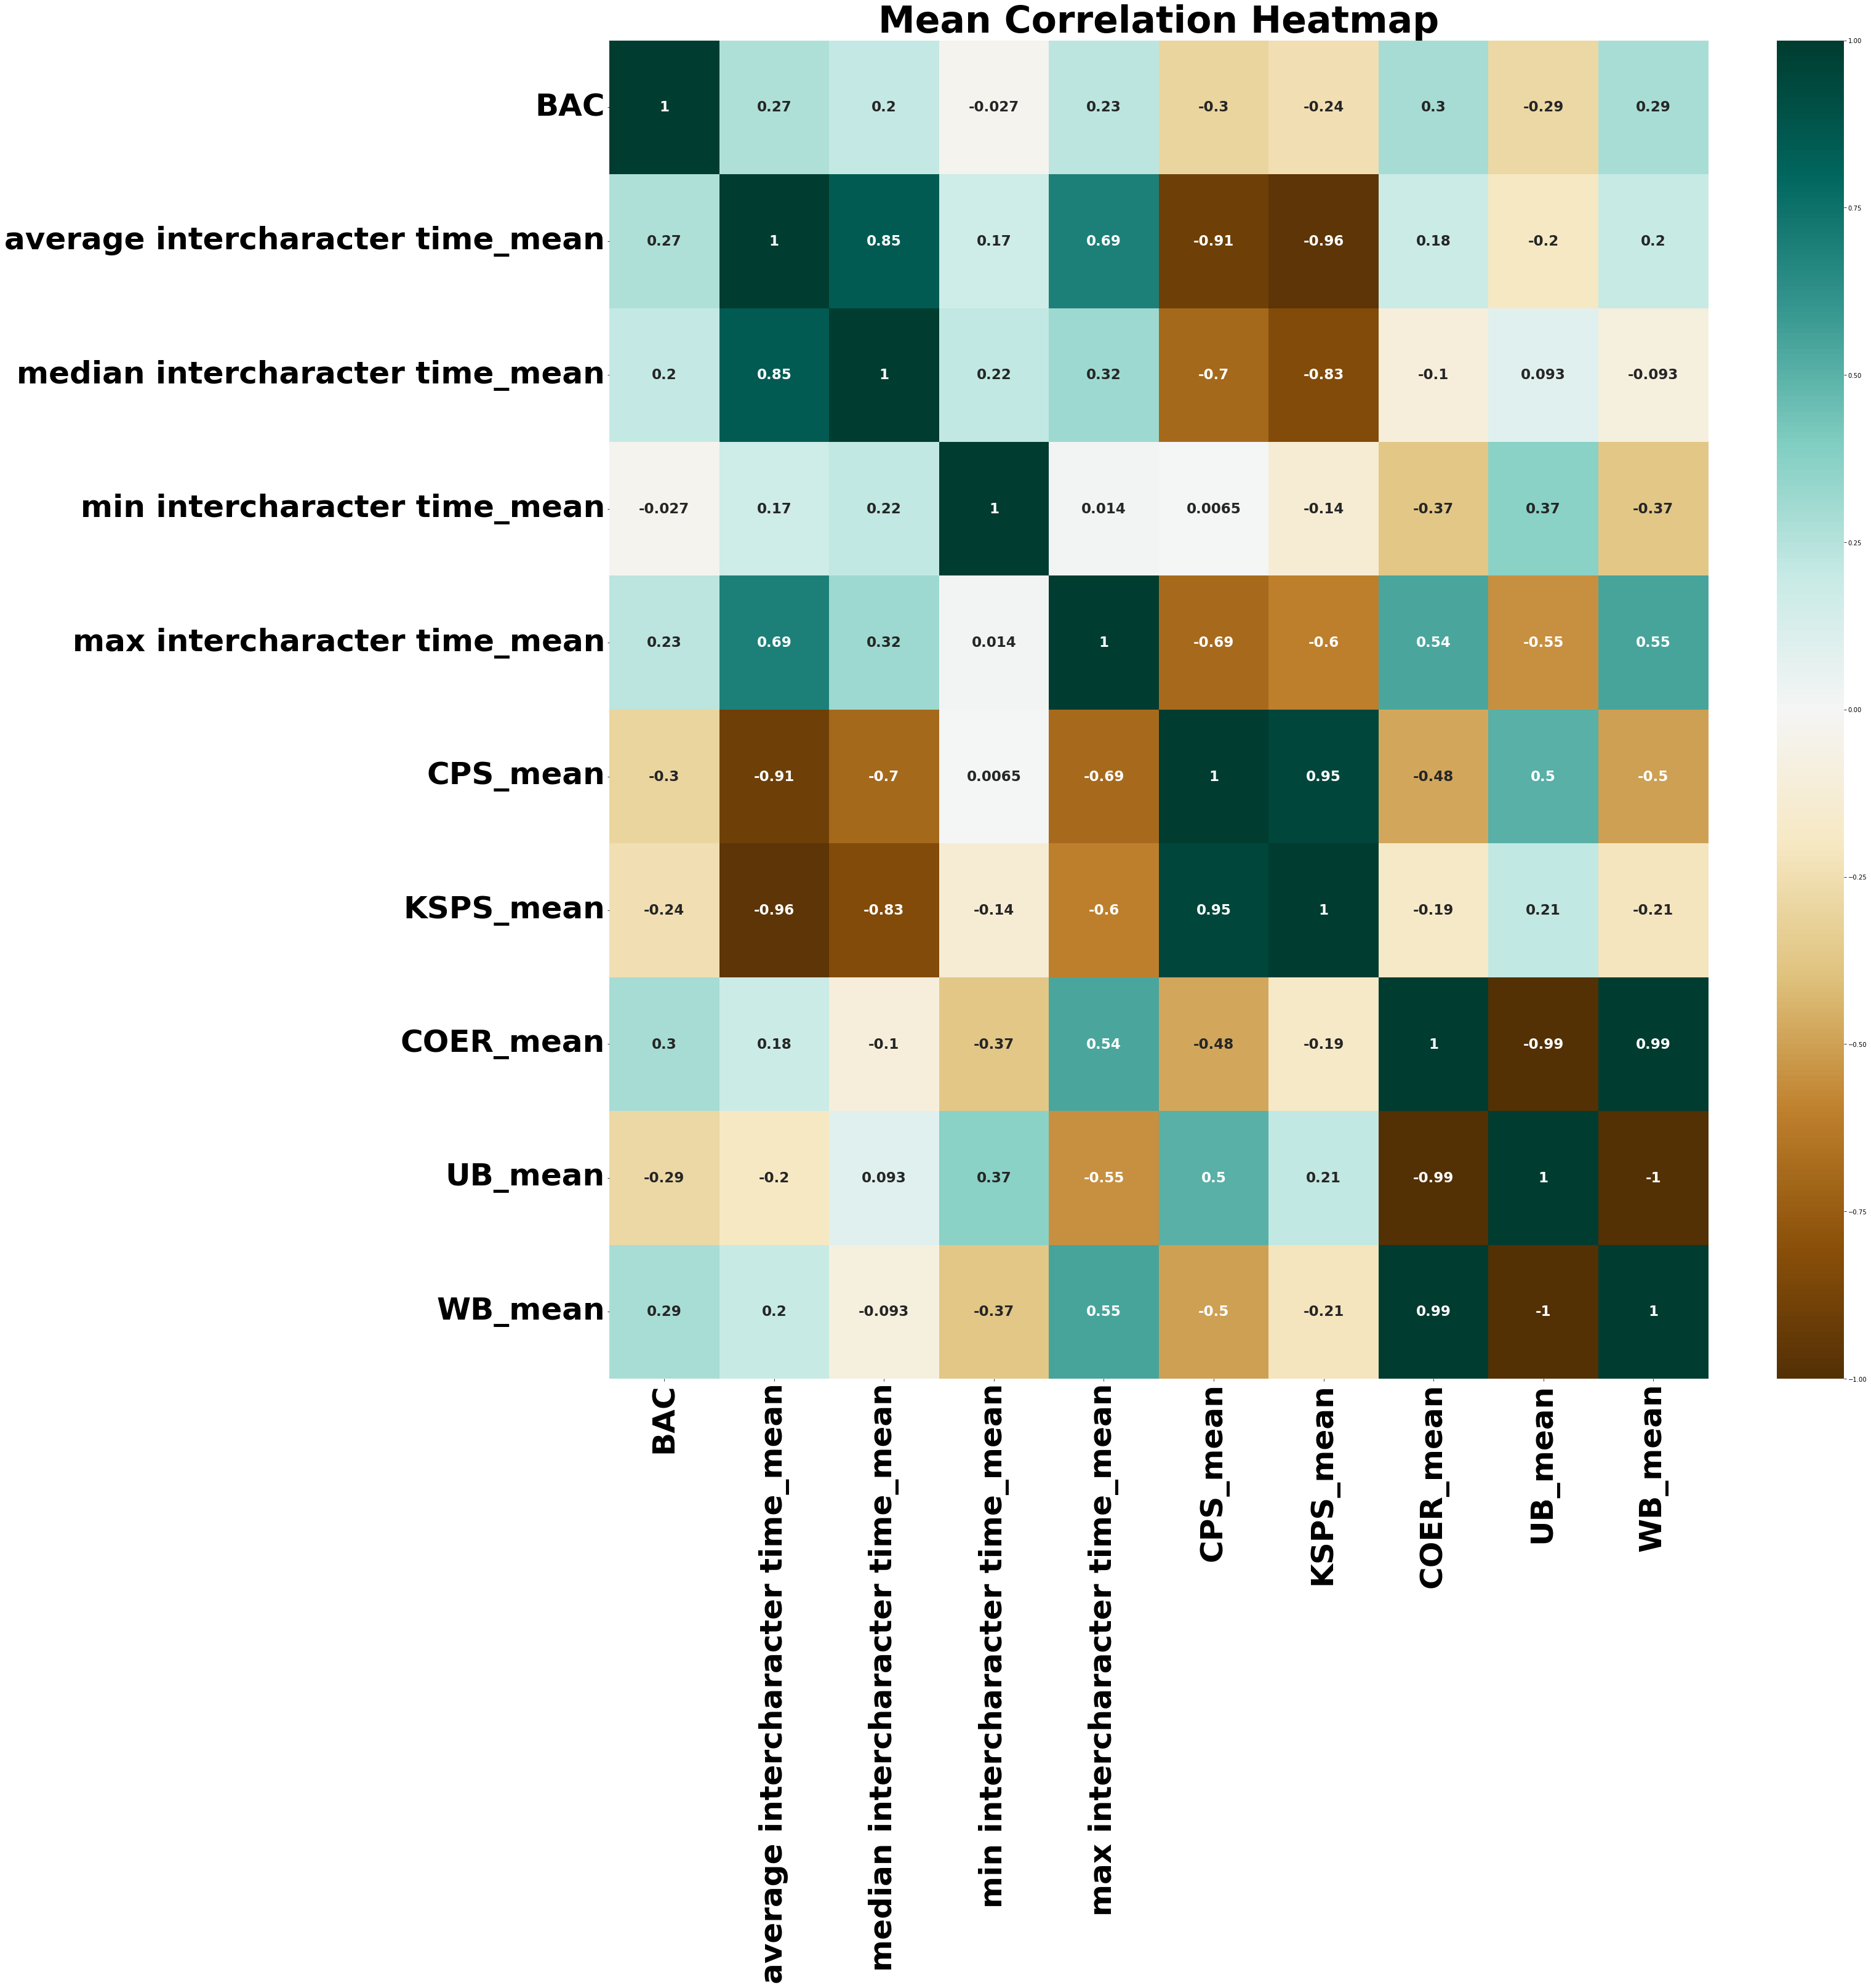

In [12]:
plt.figure(figsize=(40, 40))
only_mean_corr = merged_mean_df.corr(method='pearson')
heatmap = sns.heatmap(only_mean_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG', annot_kws={'fontsize':fontsize, 'fontweight': 'bold'})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=50, fontweight='bold')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=50, fontweight='bold')
heatmap.set_title('Mean Correlation Heatmap', fontdict={'fontsize':60, 'fontweight': 'bold'}, pad=10)

# Median data correlation

Text(0.5, 1.0, 'Median Correlation Heatmap')

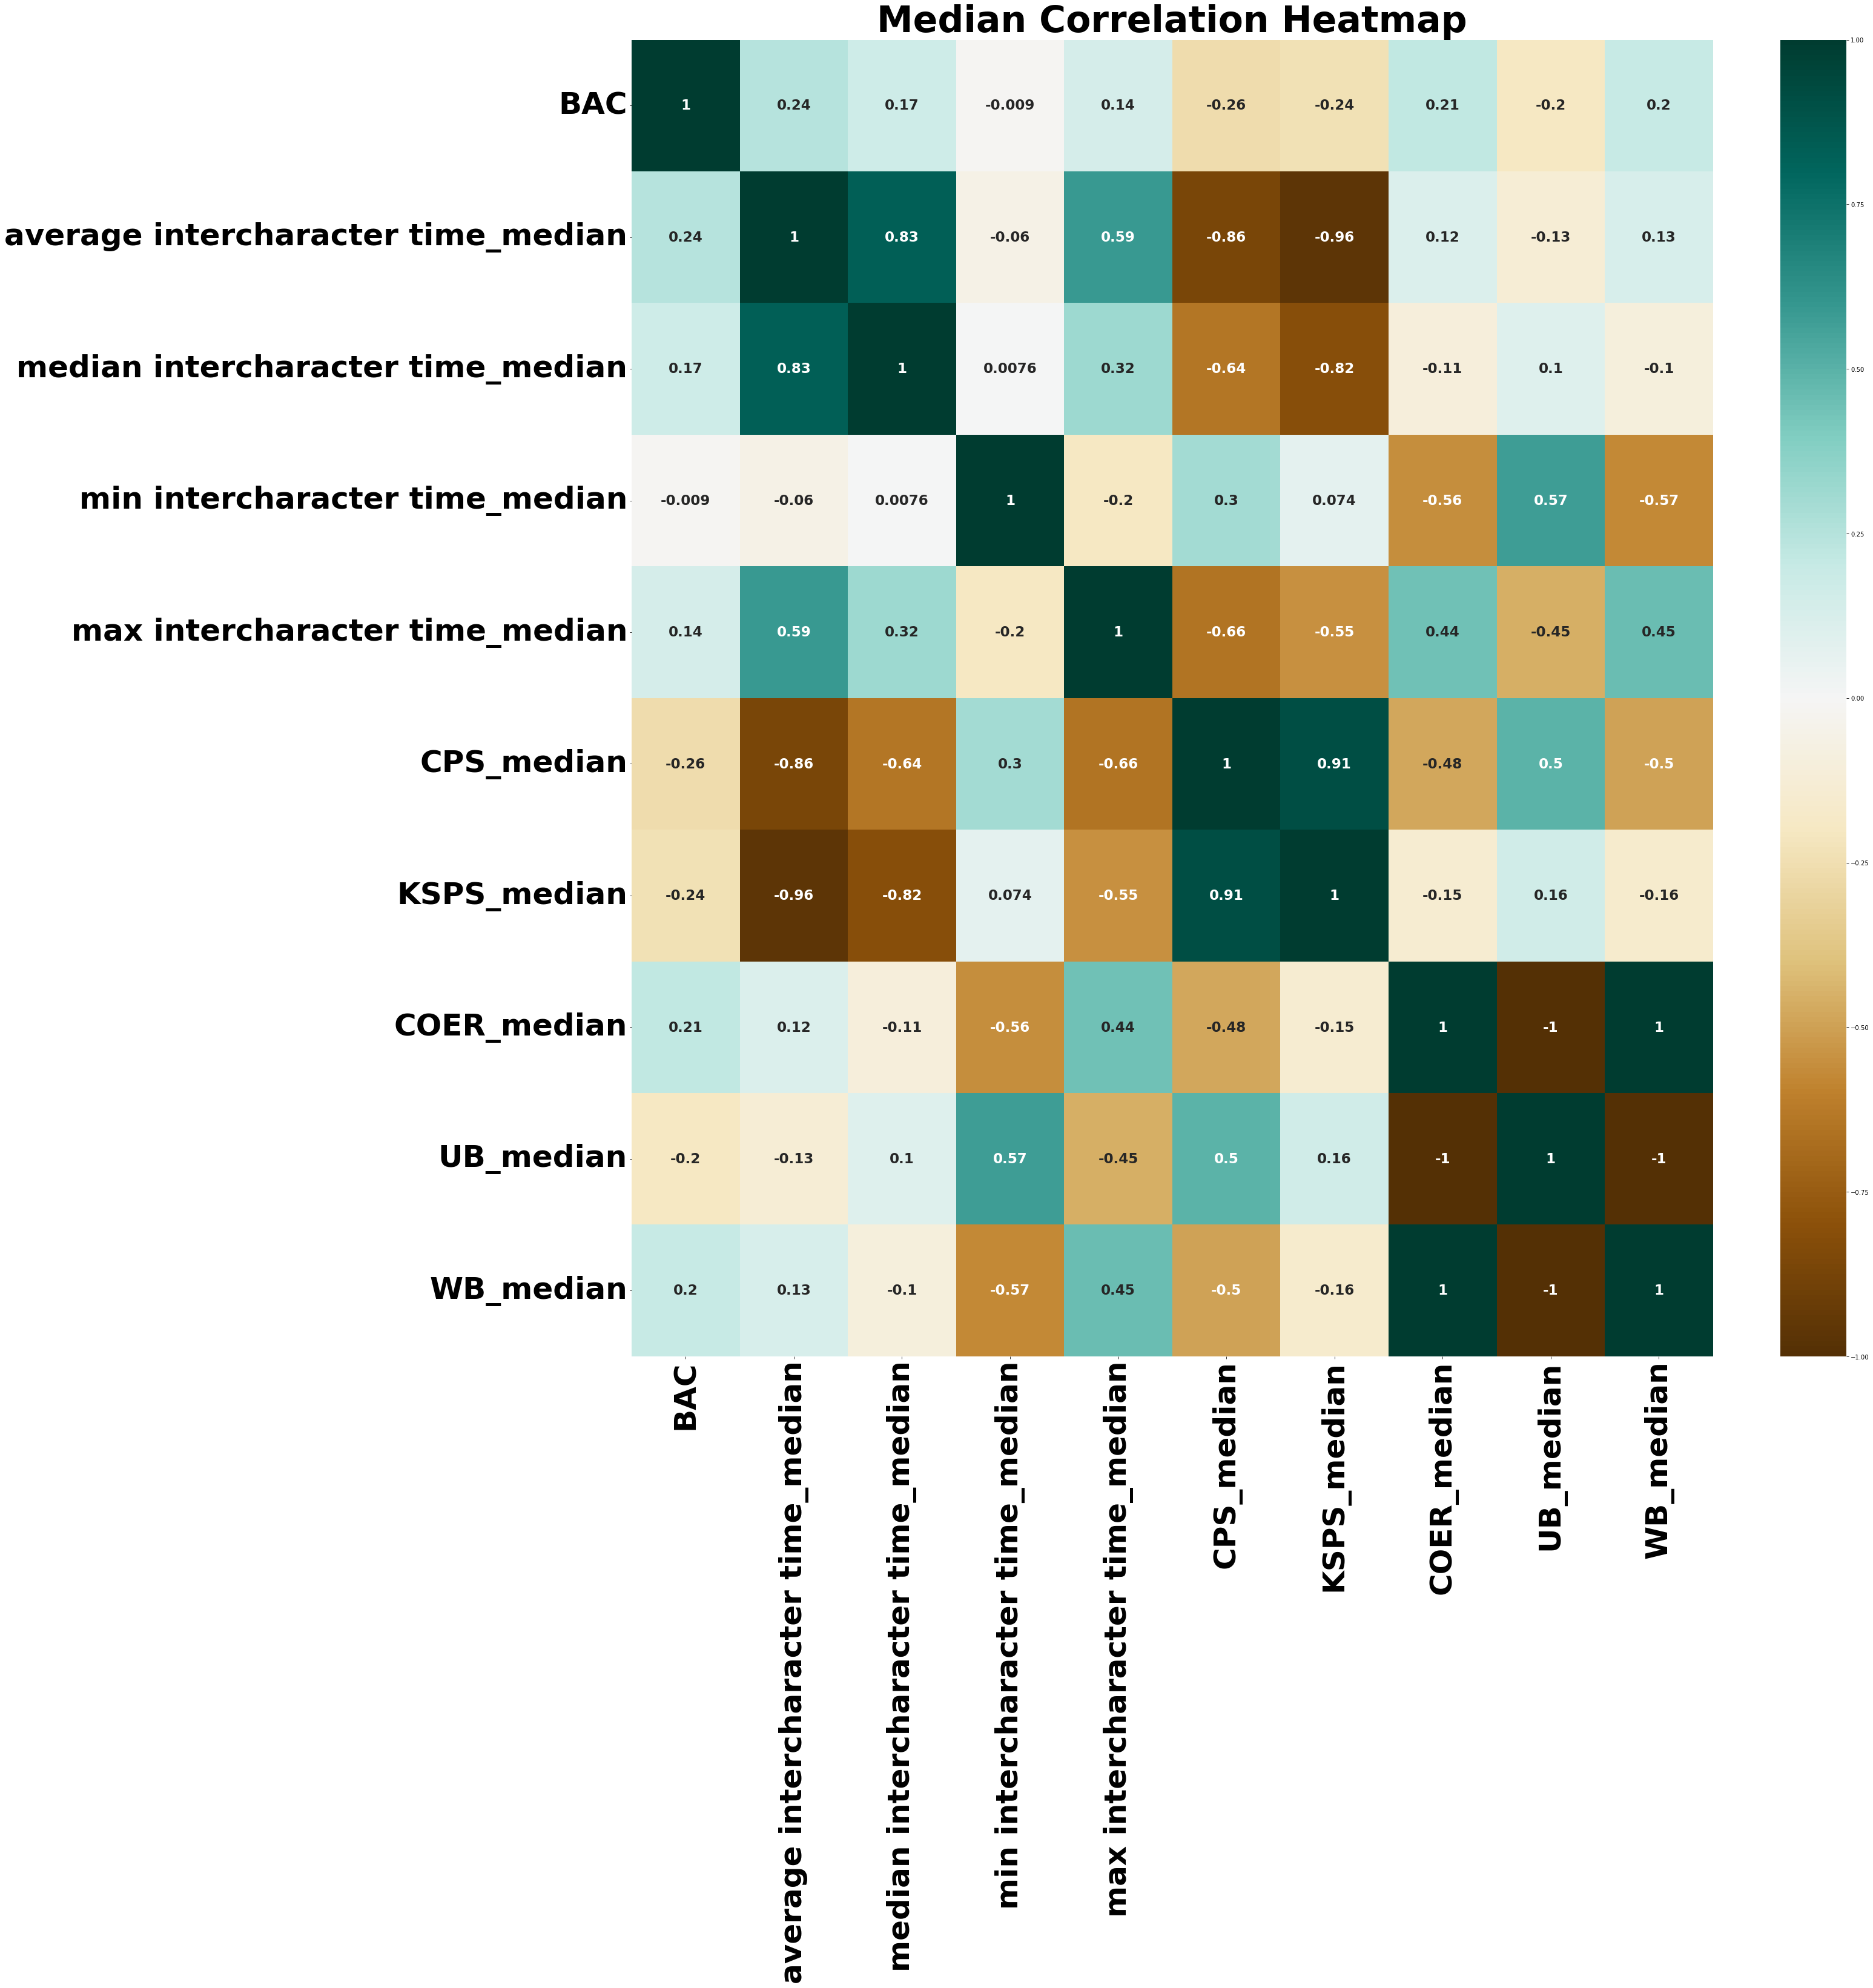

In [13]:
plt.figure(figsize=(40, 40))
only_median_corr = merged_median_df.corr(method='pearson')
heatmap = sns.heatmap(only_median_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG', annot_kws={'fontsize':fontsize, 'fontweight': 'bold'})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=50, fontweight='bold')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=50, fontweight='bold')
heatmap.set_title('Median Correlation Heatmap', fontdict={'fontsize':60, 'fontweight': 'bold'}, pad=10)

# Raw data correlation
CNT 데이터는 mean, median 데이터가 존재하지 않으므로 raw data만 correlation 시각화 가능!

Text(0.5, 1.0, 'Raw Correlation Heatmap')

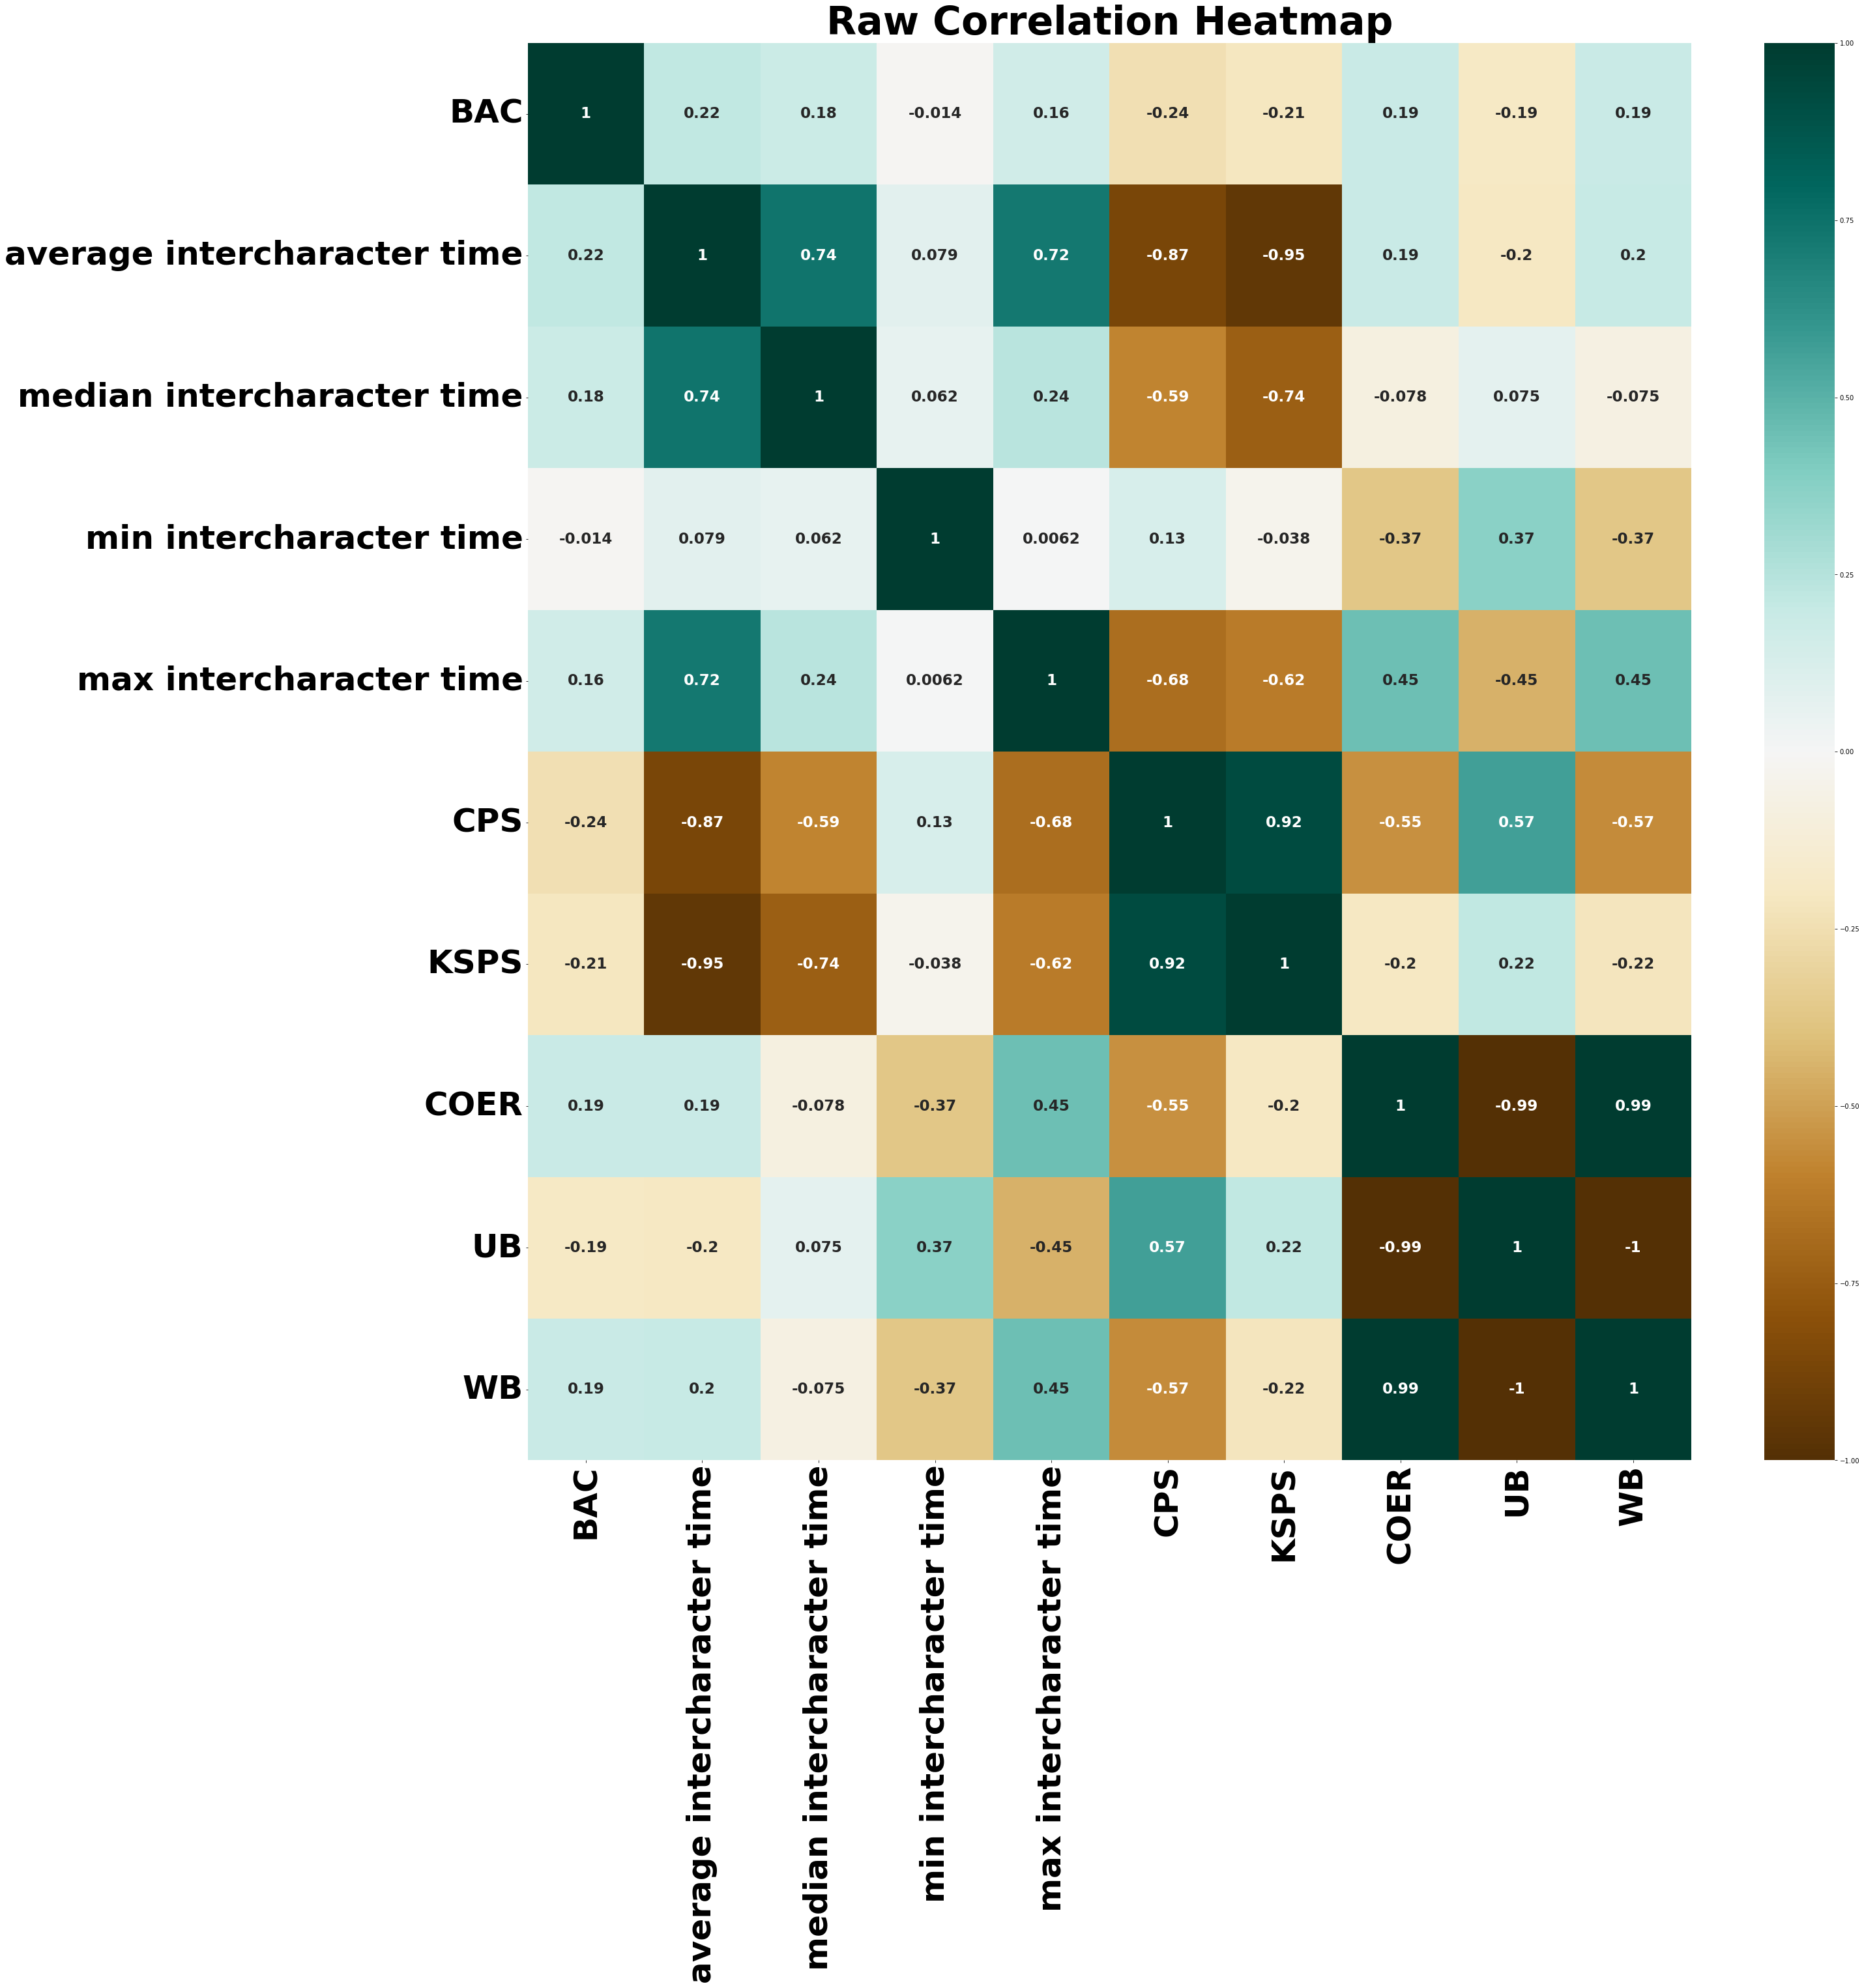

In [14]:
plt.figure(figsize=(40, 40))
only_raw_corr = merged_raw_df.corr(method='pearson')
heatmap = sns.heatmap(only_raw_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG', annot_kws={'fontsize':fontsize, 'fontweight': 'bold'})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=50, fontweight='bold')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=50, fontweight='bold')
heatmap.set_title('Raw Correlation Heatmap', fontdict={'fontsize':60, 'fontweight': 'bold'}, pad=10)